In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load in the data
# Start with Aaron Judge
judge = pd.read_csv('judge.csv')

# Load Giancarlo Stanton 
stanton = pd.read_csv('stanton.csv')

# Display all columns
pd.set_option('display.max_columns', None)

# Custom Functions
def assign_x_coord(row):
    """
    Assigns an x-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13
    and 14 are ignored for plotting simplicity.
    """
    # Left third of strike zone
    if row.zone in [1,4,7]:
        return 1
    # Middle third of strike zone
    if row.zone in [2,5,8]:
        return 2
    # Right third of strike zone
    if row.zone in [3,6,9]:
        return 3

def assign_y_coord(row):
    """
    Assigns a y-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13
    and 14 are ignored for pltting simplicity.
    """
    # Upper thrid of strike zone
    if row.zone in [1,2,3]:
        return 3
    # Middle third of strike zone
    if row.zone in [4,5,6]:
        return 2
    # Lower third of strike zone
    if row.zone in [7,8,9]:
        return 3

# Display the last five rows of Judge file
judge.tail()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,pos2_person_id,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pos1_person_id,pos2_person_id.1,pos3_person_id,pos4_person_id,pos5_person_id,pos6_person_id,pos7_person_id,pos8_person_id,pos9_person_id,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number
3431,CH,2016-08-13,85.6,-1.9659,5.9113,Aaron Judge,592450,542882,NaN,ball,NaN,NaN,NaN,NaN,14.0,NaN,R,R,R,NYY,TB,B,NaN,NaN,0,0,2016,-0.379108,0.370567,0.739,1.442,NaN,NaN,NaN,0,5,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_144259,6.960,-124.371,-4.756,-2.821,23.634,-30.220,3.93,1.82,NaN,NaN,NaN,84.459,1552.0,5.683,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.8144,0.00,0.000,NaN,NaN,NaN,NaN,NaN,36,1
3432,CH,2016-08-13,87.6,-1.9318,5.9349,Aaron Judge,592450,542882,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,4.0,Aaron Judge homers (1) on a fly ball to center...,R,R,R,NYY,TB,X,NaN,fly_ball,1,2,2016,-0.295608,0.320400,-0.419,3.273,NaN,NaN,NaN,2,2,Bot,130.45,14.58,NaN,NaN,571912.0,NaN,160813_135833,4.287,-127.452,-0.882,-1.972,24.694,-30.705,4.01,1.82,446.0,108.8,27.410,86.412,1947.0,5.691,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.8064,0.98,1.937,2.0,1.0,0.0,3.0,6.0,14,4
3433,CH,2016-08-13,87.2,-2.0285,5.8656,Aaron Judge,592450,542882,NaN,ball,NaN,NaN,NaN,NaN,14.0,NaN,R,R,R,NYY,TB,B,NaN,NaN,0,2,2016,-0.668575,0.198567,0.561,0.960,NaN,NaN,NaN,2,2,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_135815,7.491,-126.665,-5.862,-6.393,21.952,-32.121,4.01,1.82,NaN,NaN,NaN,86.368,1761.0,5.721,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.7770,0.00,0.000,NaN,NaN,NaN,NaN,NaN,14,3
3434,CU,2016-08-13,79.7,-1.7108,6.1926,Aaron Judge,592450,542882,NaN,foul,NaN,NaN,NaN,NaN,4.0,NaN,R,R,R,NYY,TB,S,NaN,NaN,0,1,2016,0.397442,-0.614133,-0.803,2.742,NaN,NaN,NaN,2,2,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_135752,1.254,-116.062,0.439,5.184,21.328,-39.866,4.01,1.82,9.0,55.8,-24.973,77.723,2640.0,5.022,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,55.4756,0.00,0.000,NaN,NaN,NaN,NaN,1.0,14,2
3435,FF,2016-08-13,93.2,-1.8476,6.0063,Aaron Judge,592450,542882,NaN,called_strike,NaN,NaN,NaN,NaN,8.0,NaN,R,R,R,NYY,TB,S,NaN,NaN,0,0,2016,-0.823050,1.623300,-0.273,2.471,NaN,NaN,NaN,2,2,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_135736,5.994,-135.497,-6.736,-9.360,26.782,-13.446,4.01,1.82,NaN,NaN,NaN,92.696,2271.0,6.068,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.4299,0.00,0.000,NaN,NaN,NaN,NaN,NaN,14,1


In [2]:
# How many of each event did Judge and Stanton have in 2017?
# Judge events 2017
judge_events_2017 = judge.loc[judge['game_year'] == 2017].events.value_counts()
print("Aaron Judge batted ball event totals, 2017:")
print(judge_events_2017)

Aaron Judge batted ball event totals, 2017:
events
strikeout                    207
field_out                    146
walk                         116
single                        75
home_run                      52
double                        24
grounded_into_double_play     15
intent_walk                   11
force_out                     11
hit_by_pitch                   5
sac_fly                        4
fielders_choice_out            4
field_error                    4
triple                         3
strikeout_double_play          1
Name: count, dtype: int64


In [3]:
# Stanton events 2017
stanton_events_2017 = stanton.loc[stanton['game_year'] == 2017].events.value_counts()
print("Giancarlo Stanton batted ball event totals, 2017:")
print(stanton_events_2017)

Giancarlo Stanton batted ball event totals, 2017:
events
field_out                    239
strikeout                    161
single                        77
walk                          72
home_run                      59
double                        32
intent_walk                   13
grounded_into_double_play     13
force_out                      7
hit_by_pitch                   7
field_error                    5
sac_fly                        3
fielders_choice_out            2
strikeout_double_play          2
pickoff_1b                     1
Name: count, dtype: int64


In [4]:
# Which palyer hits home runs slightly lower and slightly harder?
# Filter for home runs
judge_hr = judge.loc[judge['events'] == 'home_run']
stanton_hr = stanton.loc[stanton['events']=='home_run']

/tmp/ipykernel_611/9529357.py:3: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=judge_hr.launch_angle, y=judge_hr.launch_speed, cmap="Blues", shade=True, shade_lowest=False, ax=ax1[0]).set_title('Aaron Judge\nHome Runs, 2015-2017')
/tmp/ipykernel_611/9529357.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=judge_hr.launch_angle, y=judge_hr.launch_speed, cmap="Blues", shade=True, shade_lowest=False, ax=ax1[0]).set_title('Aaron Judge\nHome Runs, 2015-2017')
/tmp/ipykernel_611/9529357.py:4: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=stanton_hr.launch_angle, y=stanton_hr.launch_speed, cmap="Blues", shade=True, shade

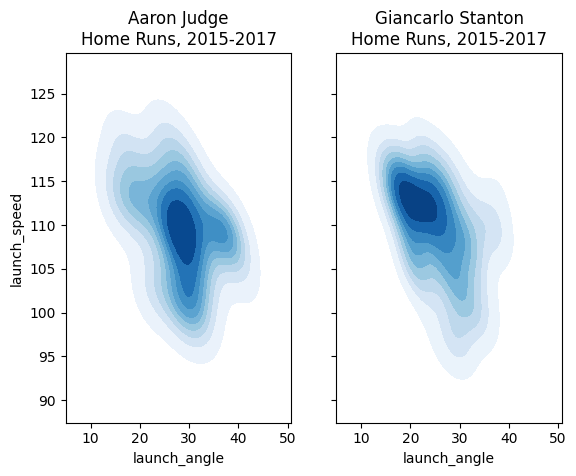

In [5]:
# Create a visualization to compare launch speed and launch angle for HR
fig1, ax1 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.kdeplot(x=judge_hr.launch_angle, y=judge_hr.launch_speed, cmap="Blues", shade=True, shade_lowest=False, ax=ax1[0]).set_title('Aaron Judge\nHome Runs, 2015-2017')
sns.kdeplot(x=stanton_hr.launch_angle, y=stanton_hr.launch_speed, cmap="Blues", shade=True, shade_lowest=False, ax=ax1[1]).set_title('Giancarlo Stanton\nHome Runs, 2015-2017')

player_hr = "Stanton"

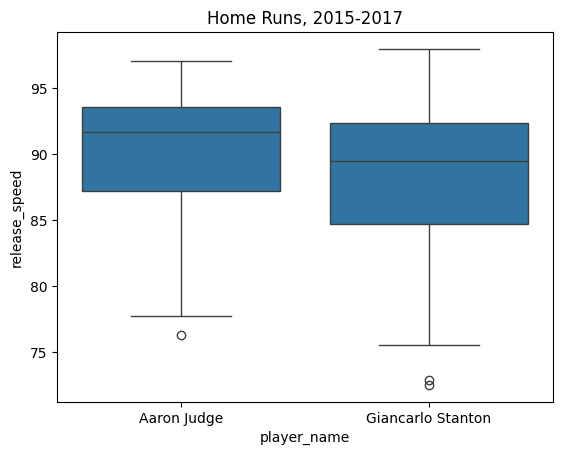

In [6]:
# Compare the pitch velocity for both players
# Combine both df
combined_df_hr = pd.concat([judge_hr, stanton_hr])

# Create a boxplot 
sns.boxplot(x='player_name', y='release_speed', color='tab:blue', data=combined_df_hr).set_title('Home Runs, 2015-2017')

# Player fast
player_fast = "Judge"

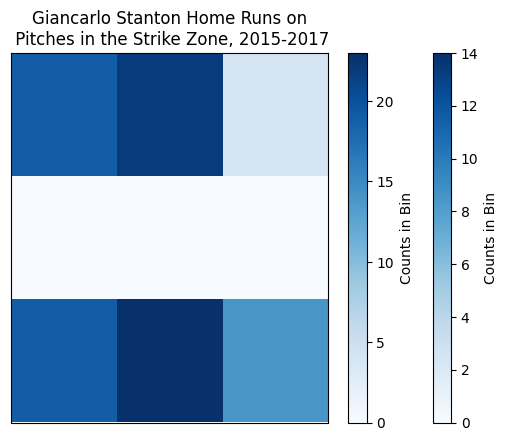

In [7]:
# Construct a 2D histogram for each player that visualizes the home run strike zones, ignoring zones 11, 12, 13, and 14 for simplicity.

# Zones 11, 12, 13, and 14 are to be ignored for plotting simplicity
judge_strike_hr = judge_hr.copy().loc[judge_hr.zone <= 9]

# Assign Cartesian coordinates to pitches in the strike zone for Judge home runs
judge_strike_hr['zone_x'] = judge_strike_hr.apply(assign_x_coord, axis=1)
judge_strike_hr['zone_y'] = judge_strike_hr.apply(assign_y_coord, axis=1)

# Plot Judge's home run zone as a 2D histogram with a colorbar and save the figure to a variable
plt.hist2d(judge_strike_hr.zone_x, judge_strike_hr.zone_y, bins = 3, cmap='Blues')
plt.title('Aaron Judge Home Runs on\n Pitches in the Strike Zone, 2015-2017')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')

# Zones 11, 12, 13, and 14 are to be ignored for plotting simplicity
stanton_strike_hr = stanton_hr.copy().loc[stanton_hr.zone <= 9]

# Assign Cartesian coordinates to pitches in the strike zone for Stanton home runs
stanton_strike_hr['zone_x'] = stanton_strike_hr.apply(assign_x_coord, axis=1)
stanton_strike_hr['zone_y'] = stanton_strike_hr.apply(assign_y_coord, axis=1)

# Plot Stanton's home run zone as a 2D histogram with a colorbar
plt.hist2d(stanton_strike_hr.zone_x, stanton_strike_hr.zone_y, bins = 3, cmap='Blues')
plt.title('Giancarlo Stanton Home Runs on\n Pitches in the Strike Zone, 2015-2017')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')